# Grid Search MLP 1

Explorando busca em grade para encontrar melhor arquitetura com uma camada oculta.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

## Carregando dados

In [2]:
# Carregando DataFrame
chainDF = pd.read_csv('./corrente.csv')

targetS = chainDF.pop('classe')

# Carregando Rótulos das características
feature_names = chainDF.columns

# Carregando rótulos das classes
target_names = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

# Definindo variáveis
X, y = chainDF.to_numpy(), targetS.to_numpy()

# Declarando intervalo dos valores de camada oculta
one_layer_sizes = np.arange(50, 210, 25)

# Declarando array com sementes para reprodutibilidade da distribuição
seed_array1 = np.random.randint(0, 9000, 15)

print(f'seeds: {seed_array1};\nhidden_layer_sizes: {one_layer_sizes};')

seeds: [3995 8601 3397 3869 7499 8227 8856 1513 2970 3419 3626 3742 6322 3876
 3395];
hidden_layer_sizes: [ 50  75 100 125 150 175 200];


## Explorando Grid

15 rodadas de classificação com intervalo de valores para a quantidade de neurônios na primeira camada.

In [3]:
# Declarando lista com arrays de acurácia para cada camada
one_layer_acc = []

for hidden_layer in one_layer_sizes:
    # Declarando lista para armazenar acurácias de cada rodada
    acc = []

    # Rodadas de classificação
    for seed in seed_array1:
        # Distribuindo os dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando Standard Scaler
        sc = StandardScaler().fit(X_pre_train)

        # Pré-processando dados
        X_train = sc.transform(X_pre_train)
        X_test = sc.transform(X_pre_test)

        # Instanciando e treinando classificador
        classifier = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            solver='adam',
            activation='tanh'
        ).fit(
            X_train,
            y_train
        )

        # Gerando resultados e adicionando à lista
        acc.append(classifier.score(X_test, y_test))
    
    one_layer_acc.append(acc)

oneLayer1DF = pd.DataFrame(
    data=np.array(one_layer_acc),
    index=np.array([f'hls:{hidden_layer}' for hidden_layer in one_layer_sizes])
).transpose()

oneLayer1DF

,hls:50,hls:75,hls:100,hls:125,hls:150,hls:175,hls:200
0,0.611087,0.635821,0.653731,0.663113,0.677186,0.672495,0.692537
1,0.576972,0.636247,0.644350,0.656716,0.672921,0.669936,0.663539
2,0.609808,0.642217,0.646908,0.667804,0.675053,0.678465,0.677612
3,0.609382,0.626866,0.629851,0.661407,0.666525,0.678038,0.681876
4,0.598294,0.646055,0.660981,0.671215,0.673774,0.669936,0.681023
5,0.580810,0.614925,0.634115,0.637100,0.638380,0.645629,0.671642
6,0.611087,0.639232,0.652878,0.672495,0.678465,0.686994,0.693390
7,0.605117,0.628571,0.647761,0.665245,0.663539,0.678465,0.700213
8,0.581237,0.645629,0.640938,0.657143,0.652878,0.667377,0.676333
9,0.610661,0.634968,0.652026,0.668657,0.668230,0.680171,0.682729


,hls:50,hls:75,hls:100,hls:125,hls:150,hls:175,hls:200
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.601819,0.635338,0.647846,0.662573,0.670391,0.677470,0.682189
std,0.013435,0.009274,0.010642,0.009620,0.012386,0.013510,0.010388
min,0.576972,0.614925,0.629851,0.637100,0.638380,0.645629,0.663539
25%,0.595096,0.630917,0.642644,0.658209,0.666311,0.671215,0.676119
50%,0.607249,0.635821,0.647761,0.663113,0.673348,0.678038,0.681023
75%,0.610874,0.640938,0.656077,0.668870,0.676759,0.682303,0.689552
max,0.620469,0.649467,0.662260,0.676333,0.689126,0.707036,0.700213


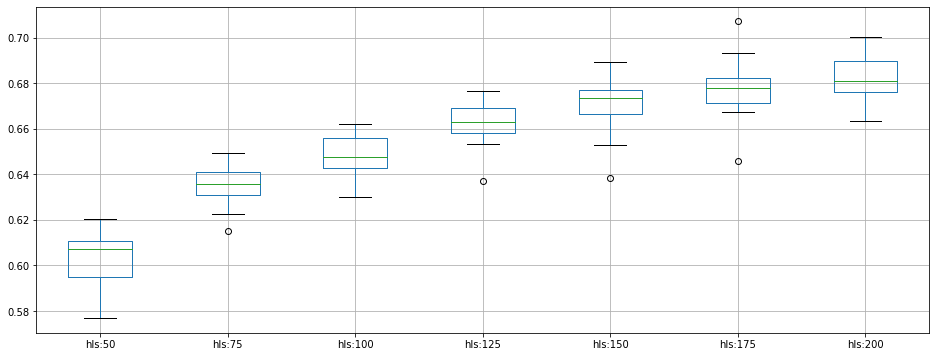

In [6]:
oneLayer1DF.boxplot(figsize=(16, 6))
oneLayer1DF.describe()

Como observado, a rede de 200 neurônios apresenta melhor resultado, porém muito próximo da rede de 175 e 150, então usarei esta ultima nas buscas de melhores hiperparâmetros.

In [10]:
X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciando Standard Scaler
sc = StandardScaler().fit(X_pre_train)

# Pré-processando dados
X_train = sc.transform(X_pre_train)
X_test = sc.transform(X_pre_test)

gscv = GridSearchCV(
    estimator=MLPClassifier(),
    param_grid={
        'hidden_layer_sizes':[150],
        'max_iter':[400],
        'activation':['tanh', 'relu'],
        'learning_rate_init':np.array([0.01, 0.005, 0.001, 0.0005, 0.0001])
    }
).fit(
    X_train,
    y_train
)

gridDF = pd.DataFrame(gscv.cv_results_)
gridDF[['param_activation', 'param_learning_rate_init', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_activation,param_learning_rate_init,mean_test_score,std_test_score,rank_test_score
6,relu,0.005,0.725365,0.014913,1
1,tanh,0.005,0.712563,0.015294,2
7,relu,0.001,0.710733,0.008913,3
5,relu,0.01,0.706710,0.009354,4
2,tanh,0.001,0.692814,0.015329,5
0,tanh,0.01,0.684954,0.015997,6
8,relu,0.0005,0.664108,0.016421,7
3,tanh,0.0005,0.648199,0.012307,8
9,relu,0.0001,0.513075,0.013713,9
4,tanh,0.0001,0.448166,0.015515,10


Com base nos resultados acima, observa-se que a função de ativação `relu` se saiu melhor que `tanh` para um mesmo `learning_rate_init` com uma diferença mínima.

In [12]:
gridDF[['param_activation', 'param_learning_rate_init', 'mean_test_score', 'std_test_score', 'rank_test_score']].query('param_activation == "tanh"').sort_values(by='rank_test_score')

,param_activation,param_learning_rate_init,mean_test_score,std_test_score,rank_test_score
1,tanh,0.005,0.712563,0.015294,2
2,tanh,0.001,0.692814,0.015329,5
0,tanh,0.01,0.684954,0.015997,6
3,tanh,0.0005,0.648199,0.012307,8
4,tanh,0.0001,0.448166,0.015515,10


In [13]:
# Declarando lista para armazenar acurácias de cada rodada
acc = []

# Rodadas de classificação
for seed in seed_array1:
    # Distribuindo os dados
    X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Instanciando Standard Scaler
    sc = StandardScaler().fit(X_pre_train)

    # Pré-processando dados
    X_train = sc.transform(X_pre_train)
    X_test = sc.transform(X_pre_test)

    # Instanciando e treinando classificador
    classifier = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=400
    ).fit(
        X_train,
        y_train
    )

    # Gerando resultados e adicionando à lista
    acc.append(classifier.score(X_test, y_test))

acc1DF = pd.DataFrame(data=acc, columns=['Acurácia'])
acc1DF

,Acurácia
0,0.735608
1,0.742857
2,0.746269
3,0.743710
4,0.745842
5,0.727079
6,0.746269
7,0.747974
8,0.729211
9,0.757783


,Acurácia
count,15.000000
mean,0.744449
std,0.009826
min,0.727079
25%,0.739019
50%,0.745842
75%,0.748401
max,0.763326


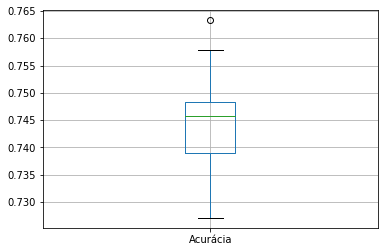

In [14]:
acc1DF.boxplot()
acc1DF.describe()

In [15]:
# Declarando lista para armazenar acurácias de cada rodada
acc = []

# Rodadas de classificação
for seed in seed_array1:
    # Distribuindo os dados
    X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Instanciando Standard Scaler
    sc = StandardScaler().fit(X_pre_train)

    # Pré-processando dados
    X_train = sc.transform(X_pre_train)
    X_test = sc.transform(X_pre_test)

    # Instanciando e treinando classificador
    classifier = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        max_iter=800
    ).fit(
        X_train,
        y_train
    )

    # Gerando resultados e adicionando à lista
    acc.append(classifier.score(X_test, y_test))

acc2DF = pd.DataFrame(data=acc, columns=['Acurácia'])
acc2DF

,Acurácia
0,0.759488
1,0.758209
2,0.758209
3,0.771002
4,0.741578
5,0.744136
6,0.741578
7,0.769723
8,0.759062
9,0.753092


In [ ]:
acc2DF.boxplot()
acc2DF.describe()